# Loan Default Prediction

## Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statistics import median, mean, mode

%matplotlib inline

In [2]:
train_data = pd.read_csv("E:\\Kaggle\\Loan Default Prediction\\Data\\train.csv")
test_data = pd.read_csv("E:\\Kaggle\\Loan Default Prediction\\Data\\test.csv")

In [3]:
train_data

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0
1,1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1
2,2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0
3,3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0
4,4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,7495,Rent,402192.0,< 1 year,0,3,8.5,107866,0,NaN,0.0,other,Short Term,129360,73492,1900,697.0,0
7496,7496,Home Mortgage,1533984.0,1 year,0,10,26.5,686312,0,43.0,0.0,debt consolidation,Long Term,444048,456399,12783,7410.0,1
7497,7497,Rent,1878910.0,6 years,0,12,32.1,1778920,0,NaN,0.0,buy a car,Short Term,99999999,477812,12479,748.0,0
7498,7498,Home Mortgage,NaN,NaN,0,21,26.5,1141250,0,NaN,0.0,debt consolidation,Short Term,615274,476064,37118,NaN,0


In [4]:
test_data

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,7500,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,7501,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,7502,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,7503,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,7504,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,9995,Home Mortgage,1020053.0,10+ years,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,9996,Home Mortgage,NaN,2 years,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,NaN
2497,9997,Home Mortgage,1171806.0,2 years,0.0,48.0,12.8,1706430.0,0.0,NaN,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,9998,Rent,723520.0,10+ years,0.0,14.0,28.8,945780.0,0.0,NaN,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0


In [5]:
train_data.info()
print('*' * 100, '\n')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
Id                              7500 non-null int64
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null int64
Number of Open Accounts         7500 non-null int64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null int64
Number of Credit Problems       7500 non-null int64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null int64
Current Credit Balance          7500 non-null int64
Monthly Debt                    7500 non-null int64
Credit Score                    5943 non-null flo

In [6]:
print(train_data.nunique())
print('*' * 80, '\n')
print(test_data.nunique())

Id                              7500
Home Ownership                     4
Annual Income                   5478
Years in current job              11
Tax Liens                          8
Number of Open Accounts           39
Years of Credit History          408
Maximum Open Credit             6963
Number of Credit Problems          8
Months since last delinquent      89
Bankruptcies                       5
Purpose                           15
Term                               2
Current Loan Amount             5386
Current Credit Balance          6592
Monthly Debt                    6716
Credit Score                     268
Credit Default                     2
dtype: int64
******************************************************************************** 

Id                              2500
Home Ownership                     4
Annual Income                   1929
Years in current job              11
Tax Liens                          8
Number of Open Accounts           35
Years of Credit 

In [7]:
print("Train Data Purpose columns unique values counts", train_data['Purpose'].nunique())
print('*' * 80, '\n')
print("Test Data Purpose columns unique values counts", test_data['Purpose'].nunique())

Train Data Purpose columns unique values counts 15
******************************************************************************** 

Test Data Purpose columns unique values counts 14


In [8]:
train_data['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [9]:
train_data.Credit Default.value_counts()

SyntaxError: invalid syntax (<ipython-input-9-52350e3d3d5c>, line 1)

## Data Cleaning 

### EDA

In [10]:
# Deleting spaces between names and interchanging with underscore

train_data.columns = ['_'.join(col.split(' ')).lower() for col in train_data.columns]
test_data.columns = ['_'.join(col.split(' ')).lower() for col in test_data.columns]

In [11]:
print(train_data.columns)
print('*' * 80, '\n')
print(test_data.columns)

Index(['id', 'home_ownership', 'annual_income', 'years_in_current_job',
       'tax_liens', 'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'purpose', 'term',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score', 'credit_default'],
      dtype='object')
******************************************************************************** 

Index(['id', 'home_ownership', 'annual_income', 'years_in_current_job',
       'tax_liens', 'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'purpose', 'term',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score'],
      dtype='object')


In [12]:
train_data.credit_default.value_counts()

0    5387
1    2113
Name: credit_default, dtype: int64

In [13]:
1e2 * train_data['credit_default'].value_counts()/len(train_data)

0    71.826667
1    28.173333
Name: credit_default, dtype: float64

In [14]:
## using round function

round(1e2 * train_data['credit_default'].value_counts()/len(train_data), 2)

0    71.83
1    28.17
Name: credit_default, dtype: float64

In [15]:
train_null = train_data.isnull().sum()
train_null

id                                 0
home_ownership                     0
annual_income                   1557
years_in_current_job             371
tax_liens                          0
number_of_open_accounts            0
years_of_credit_history            0
maximum_open_credit                0
number_of_credit_problems          0
months_since_last_delinquent    4081
bankruptcies                      14
purpose                            0
term                               0
current_loan_amount                0
current_credit_balance             0
monthly_debt                       0
credit_score                    1557
credit_default                     0
dtype: int64

In [16]:
test_null = test_data.isnull().sum()
test_null

id                                 0
home_ownership                     0
annual_income                    513
years_in_current_job              86
tax_liens                          0
number_of_open_accounts            0
years_of_credit_history            0
maximum_open_credit                0
number_of_credit_problems          0
months_since_last_delinquent    1358
bankruptcies                       3
purpose                            0
term                               0
current_loan_amount                0
current_credit_balance             0
monthly_debt                       0
credit_score                     513
dtype: int64

In [17]:
#Display percentage of null values in each column

miss = train_data.isnull().sum() / len(train_data) * 100
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

bankruptcies                     0.186667
years_in_current_job             4.946667
annual_income                   20.760000
credit_score                    20.760000
months_since_last_delinquent    54.413333
dtype: float64

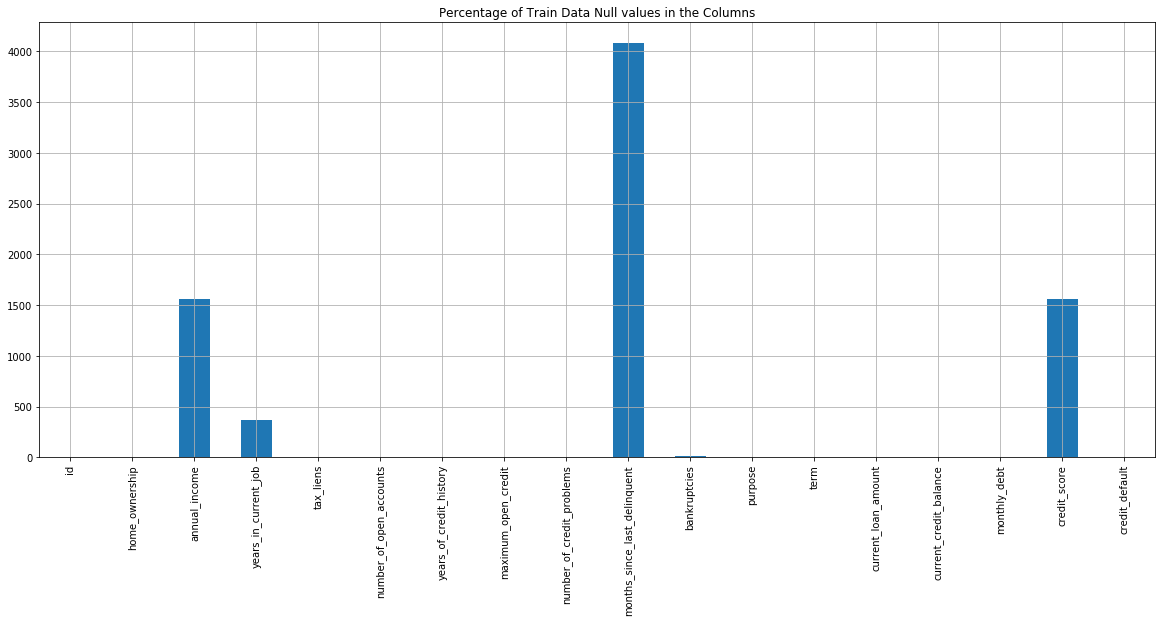

In [18]:
fig=plt.figure(figsize=(20,8))
train_null.plot(kind='bar')
plt.title('Percentage of Train Data Null values in the Columns')
plt.grid()

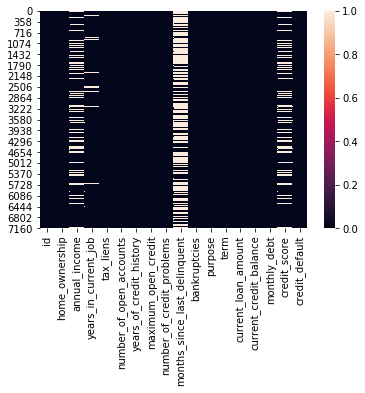

In [19]:
sns.heatmap(train_data.isnull())

In [20]:
#Display percentage of null values in each column

miss = test_data.isnull().sum() / len(test_data) * 100
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

bankruptcies                     0.12
years_in_current_job             3.44
annual_income                   20.52
credit_score                    20.52
months_since_last_delinquent    54.32
dtype: float64

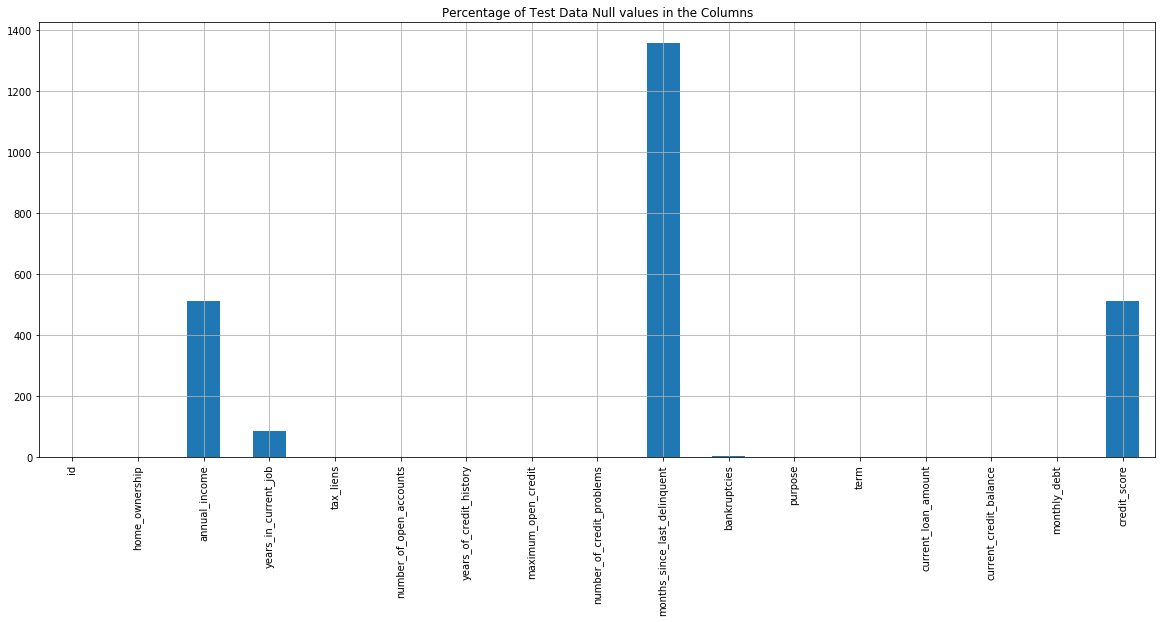

In [21]:
fig=plt.figure(figsize=(20,8))
test_null.plot(kind='bar')
plt.title('Percentage of Test Data Null values in the Columns')
plt.grid()

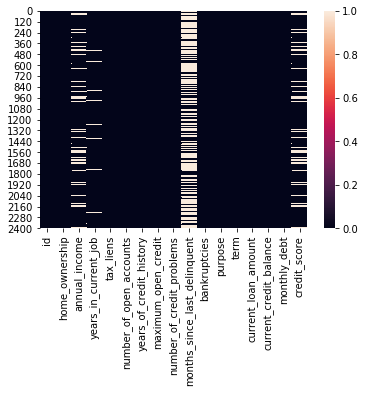

In [22]:
sns.heatmap(test_data.isnull())

In [23]:
summary = train_data.describe()
summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max
id,7500.0,3.749500e+03,2.165208e+03,0.0,1874.75,3749.5,5624.25,7.499000e+03
annual_income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.00,1168386.0,1640137.00,1.014934e+07
tax_liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.00,0.0,0.00,7.000000e+00
number_of_open_accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.00,10.0,14.00,4.300000e+01
years_of_credit_history,7500.0,1.831747e+01,7.041946e+00,4.0,13.50,17.0,21.80,5.770000e+01
maximum_open_credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.50,478159.0,793501.50,1.304726e+09
number_of_credit_problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.00,0.0,0.00,7.000000e+00
months_since_last_delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.00,32.0,50.00,1.180000e+02
bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.00,0.0,0.00,4.000000e+00
current_loan_amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.00,309573.0,519882.00,1.000000e+08


In [24]:
summary = test_data.describe()
summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max
id,2500.0,8.749500e+03,7.218322e+02,7500.0,8124.75,8749.5,9374.25,9999.0
annual_income,1987.0,1.366922e+06,9.171252e+05,106533.0,852311.50,1178475.0,1629734.50,14975610.0
tax_liens,2500.0,3.520000e-02,3.862909e-01,0.0,0.00,0.0,0.00,15.0
number_of_open_accounts,2500.0,1.118440e+01,4.852774e+00,1.0,8.00,10.0,14.00,48.0
years_of_credit_history,2500.0,1.832592e+01,7.254659e+00,3.9,13.40,17.0,22.10,53.4
maximum_open_credit,2500.0,7.105704e+05,1.511983e+06,0.0,278586.00,478676.0,802598.50,54484386.0
number_of_credit_problems,2500.0,1.620000e-01,5.598941e-01,0.0,0.00,0.0,0.00,15.0
months_since_last_delinquent,1142.0,3.418126e+01,2.202428e+01,0.0,16.00,30.0,50.00,82.0
bankruptcies,2497.0,1.069283e-01,3.571893e-01,0.0,0.00,0.0,0.00,5.0
current_loan_amount,2500.0,1.215572e+07,3.226097e+07,15422.0,187126.50,322366.0,522582.50,99999999.0


In [25]:
print(train_data.years_in_current_job.value_counts(dropna = False))

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
NaN           371
8 years       339
9 years       259
Name: years_in_current_job, dtype: int64


In [26]:
years_in_current_job_map = {'10+ years': 10,'9 years': 9,'8 years': 8,'7 years':7,'6 years':6,
                            '5 years': 5, '4 years': 4, '3 years':3, '2 years': 2,'1 year': 1, '< 1 year':0 }
train_data['years_in_current_job'] = train_data['years_in_current_job'].map(years_in_current_job_map)

In [27]:
print(train_data.years_in_current_job.value_counts(dropna = False))

10.0    2332
2.0      705
3.0      620
0.0      563
5.0      516
1.0      504
4.0      469
6.0      426
7.0      396
NaN      371
8.0      339
9.0      259
Name: years_in_current_job, dtype: int64


In [28]:
print(test_data.years_in_current_job.value_counts(dropna = False))

10+ years    810
3 years      228
2 years      212
< 1 year     207
5 years      169
1 year       153
4 years      152
7 years      140
6 years      137
8 years      107
9 years       99
NaN           86
Name: years_in_current_job, dtype: int64


In [29]:
years_in_current_job_map = {'10+ years': 10,'9 years': 9,'8 years': 8,'7 years':7,'6 years':6,
                            '5 years': 5, '4 years': 4, '3 years':3, '2 years': 2,'1 year': 1, '< 1 year':0 }
test_data['years_in_current_job'] = test_data['years_in_current_job'].map(years_in_current_job_map)

In [30]:
print(test_data.years_in_current_job.value_counts(dropna = False))

10.0    810
3.0     228
2.0     212
0.0     207
5.0     169
1.0     153
4.0     152
7.0     140
6.0     137
8.0     107
9.0      99
NaN      86
Name: years_in_current_job, dtype: int64


## Handling Null Values

In [31]:
print(train_data['bankruptcies'].value_counts(dropna = False))
print('*' * 80)
print(train_data['months_since_last_delinquent'].value_counts(dropna = False))
print('*' * 80)
print(train_data['credit_score'].value_counts(dropna = False))
print('*' * 80)
print(train_data['annual_income'].value_counts(dropna = False))

0.0    6660
1.0     786
2.0      31
NaN      14
3.0       7
4.0       2
Name: bankruptcies, dtype: int64
********************************************************************************
NaN      4081
14.0       76
29.0       71
8.0        68
33.0       68
         ... 
84.0        1
92.0        1
86.0        1
118.0       1
91.0        1
Name: months_since_last_delinquent, Length: 90, dtype: int64
********************************************************************************
NaN       1557
740.0      169
747.0      168
748.0      157
745.0      152
          ... 
602.0        1
616.0        1
585.0        1
620.0        1
7010.0       1
Name: credit_score, Length: 269, dtype: int64
********************************************************************************
NaN          1557
1161660.0       4
1058376.0       4
1043651.0       4
1338113.0       4
             ... 
1141254.0       1
7907382.0       1
1534478.0       1
972040.0        1
585751.0        1
Name: annual_income, Length:

In [32]:
print(train_data.isnull().sum())

id                                 0
home_ownership                     0
annual_income                   1557
years_in_current_job             371
tax_liens                          0
number_of_open_accounts            0
years_of_credit_history            0
maximum_open_credit                0
number_of_credit_problems          0
months_since_last_delinquent    4081
bankruptcies                      14
purpose                            0
term                               0
current_loan_amount                0
current_credit_balance             0
monthly_debt                       0
credit_score                    1557
credit_default                     0
dtype: int64


In [33]:
median(train_data.bankruptcies)

0.0

In [34]:
median(train_data.years_in_current_job)

10.0

In [35]:

train_data.bankruptcies                  =  train_data.bankruptcies.agg(lambda x : x.fillna(x.median()))
train_data.years_in_current_job          =  train_data.years_in_current_job.agg(lambda x : x.fillna( x.median()))
train_data.months_since_last_delinquent  =  train_data.months_since_last_delinquent.agg(lambda x : x.fillna( x.median()))
train_data.credit_score                  =  train_data.credit_score.agg(lambda x : x.fillna(x.median()))
train_data['annual_income']              = train_data['annual_income'].agg(lambda x : x.fillna(x.mean()))

In [36]:
mean(train_data.annual_income)

1366391.7201749957

In [37]:
train_data.isnull().sum()

id                              0
home_ownership                  0
annual_income                   0
years_in_current_job            0
tax_liens                       0
number_of_open_accounts         0
years_of_credit_history         0
maximum_open_credit             0
number_of_credit_problems       0
months_since_last_delinquent    0
bankruptcies                    0
purpose                         0
term                            0
current_loan_amount             0
current_credit_balance          0
monthly_debt                    0
credit_score                    0
credit_default                  0
dtype: int64

In [38]:
print(test_data['years_in_current_job'].value_counts(dropna = False))
print('*' * 80)
print(test_data['bankruptcies'].value_counts(dropna = False))
print('*' * 80)
print(test_data['months_since_last_delinquent'].value_counts(dropna = False))
print('*' * 80)
print(test_data['credit_score'].value_counts(dropna = False))
print('*' * 80)
print(test_data['annual_income'].value_counts(dropna = False))

10.0    810
3.0     228
2.0     212
0.0     207
5.0     169
1.0     153
4.0     152
7.0     140
6.0     137
8.0     107
9.0      99
NaN      86
Name: years_in_current_job, dtype: int64
********************************************************************************
0.0    2252
1.0     234
2.0       5
3.0       3
NaN       3
5.0       2
4.0       1
Name: bankruptcies, dtype: int64
********************************************************************************
NaN     1358
16.0      30
23.0      28
14.0      28
24.0      26
        ... 
60.0       5
81.0       5
64.0       5
65.0       5
82.0       3
Name: months_since_last_delinquent, Length: 84, dtype: int64
********************************************************************************
NaN       513
746.0      56
739.0      55
741.0      54
740.0      50
         ... 
6850.0      1
6310.0      1
6150.0      1
6840.0      1
6670.0      1
Name: credit_score, Length: 212, dtype: int64
***************************************************

In [39]:
median(test_data.bankruptcies)

0.0

In [40]:
median(test_data.years_in_current_job)

10.0

In [41]:

test_data.bankruptcies                  =  test_data.bankruptcies.agg(lambda x : x.fillna(x.median()))
test_data.years_in_current_job          =  test_data.years_in_current_job.agg(lambda x : x.fillna(x.median()))
test_data.months_since_last_delinquent  =  test_data.months_since_last_delinquent.agg(lambda x : x.fillna(x.median()))
test_data.credit_score                  =  test_data.credit_score.agg(lambda x : x.fillna(x.median()))
test_data['annual_income']              =  test_data['annual_income'].agg(lambda x : x.fillna(x.mean()))

In [42]:
mean(test_data.annual_income)

1366921.6758933065

In [43]:
test_data.isnull().sum()

id                              0
home_ownership                  0
annual_income                   0
years_in_current_job            0
tax_liens                       0
number_of_open_accounts         0
years_of_credit_history         0
maximum_open_credit             0
number_of_credit_problems       0
months_since_last_delinquent    0
bankruptcies                    0
purpose                         0
term                            0
current_loan_amount             0
current_credit_balance          0
monthly_debt                    0
credit_score                    0
dtype: int64

In [44]:
 train_data

,id,home_ownership,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default
0,0,Own Home,4.820870e+05,6.0,0,11,26.3,685960,1,32.0,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0
1,1,Own Home,1.025487e+06,10.0,0,15,15.3,1181730,0,32.0,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1
2,2,Home Mortgage,7.514120e+05,8.0,0,11,35.0,1182434,0,32.0,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0
3,3,Own Home,8.050680e+05,6.0,0,8,22.5,147400,1,32.0,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0
4,4,Rent,7.762640e+05,8.0,0,13,13.6,385836,1,32.0,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,7495,Rent,4.021920e+05,0.0,0,3,8.5,107866,0,32.0,0.0,other,Short Term,129360,73492,1900,697.0,0
7496,7496,Home Mortgage,1.533984e+06,1.0,0,10,26.5,686312,0,43.0,0.0,debt consolidation,Long Term,444048,456399,12783,7410.0,1
7497,7497,Rent,1.878910e+06,6.0,0,12,32.1,1778920,0,32.0,0.0,buy a car,Short Term,99999999,477812,12479,748.0,0
7498,7498,Home Mortgage,1.366392e+06,6.0,0,21,26.5,1141250,0,32.0,0.0,debt consolidation,Short Term,615274,476064,37118,731.0,0


In [45]:
print("Train Data :-")

print("Home Ownership unique values :", train_data['home_ownership'].nunique())

print("Purpose unique values        :", train_data['purpose'].nunique())

print("Term unique values           :", train_data['term'].nunique())

Train Data :-
Home Ownership unique values : 4
Purpose unique values        : 15
Term unique values           : 2


In [46]:
test_data

,id,home_ownership,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score
0,7500,Rent,1.366922e+06,4.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,731.0
1,7501,Rent,2.318380e+05,1.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,7502,Home Mortgage,1.152540e+06,3.0,0.0,10.0,13.7,204600.0,0.0,30.0,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,7503,Home Mortgage,1.220313e+06,10.0,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,7504,Home Mortgage,2.340952e+06,6.0,0.0,11.0,23.6,1207272.0,0.0,30.0,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,9995,Home Mortgage,1.020053e+06,10.0,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,9996,Home Mortgage,1.366922e+06,2.0,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,731.0
2497,9997,Home Mortgage,1.171806e+06,2.0,0.0,48.0,12.8,1706430.0,0.0,30.0,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,9998,Rent,7.235200e+05,10.0,0.0,14.0,28.8,945780.0,0.0,30.0,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0


In [47]:
print("Test Data:-")

print("Home Ownership unique values :", test_data['home_ownership'].nunique())

print("Purpose unique values        :", test_data['purpose'].nunique())

print("Term unique values           :", test_data['term'].nunique())

Test Data:-
Home Ownership unique values : 4
Purpose unique values        : 14
Term unique values           : 2


In [48]:
print("Train Data Purposes column unique values        :", train_data['purpose'].nunique())

print("Test Data Purpose column unique values          :", test_data['purpose'].nunique())

Train Data Purposes column unique values        : 15
Test Data Purpose column unique values          : 14


In [49]:
train_data = train_data[train_data.purpose != 'renewable energy']

In [50]:
train_data.purpose.value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
Name: purpose, dtype: int64

In [51]:
train_data.credit_default.value_counts()

0    5387
1    2111
Name: credit_default, dtype: int64

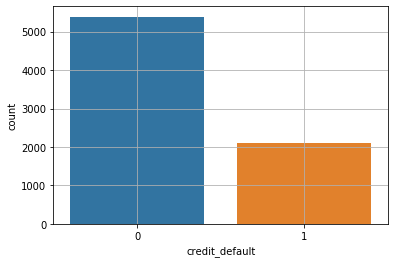

In [52]:
sns.countplot(train_data.credit_default)
plt.grid()

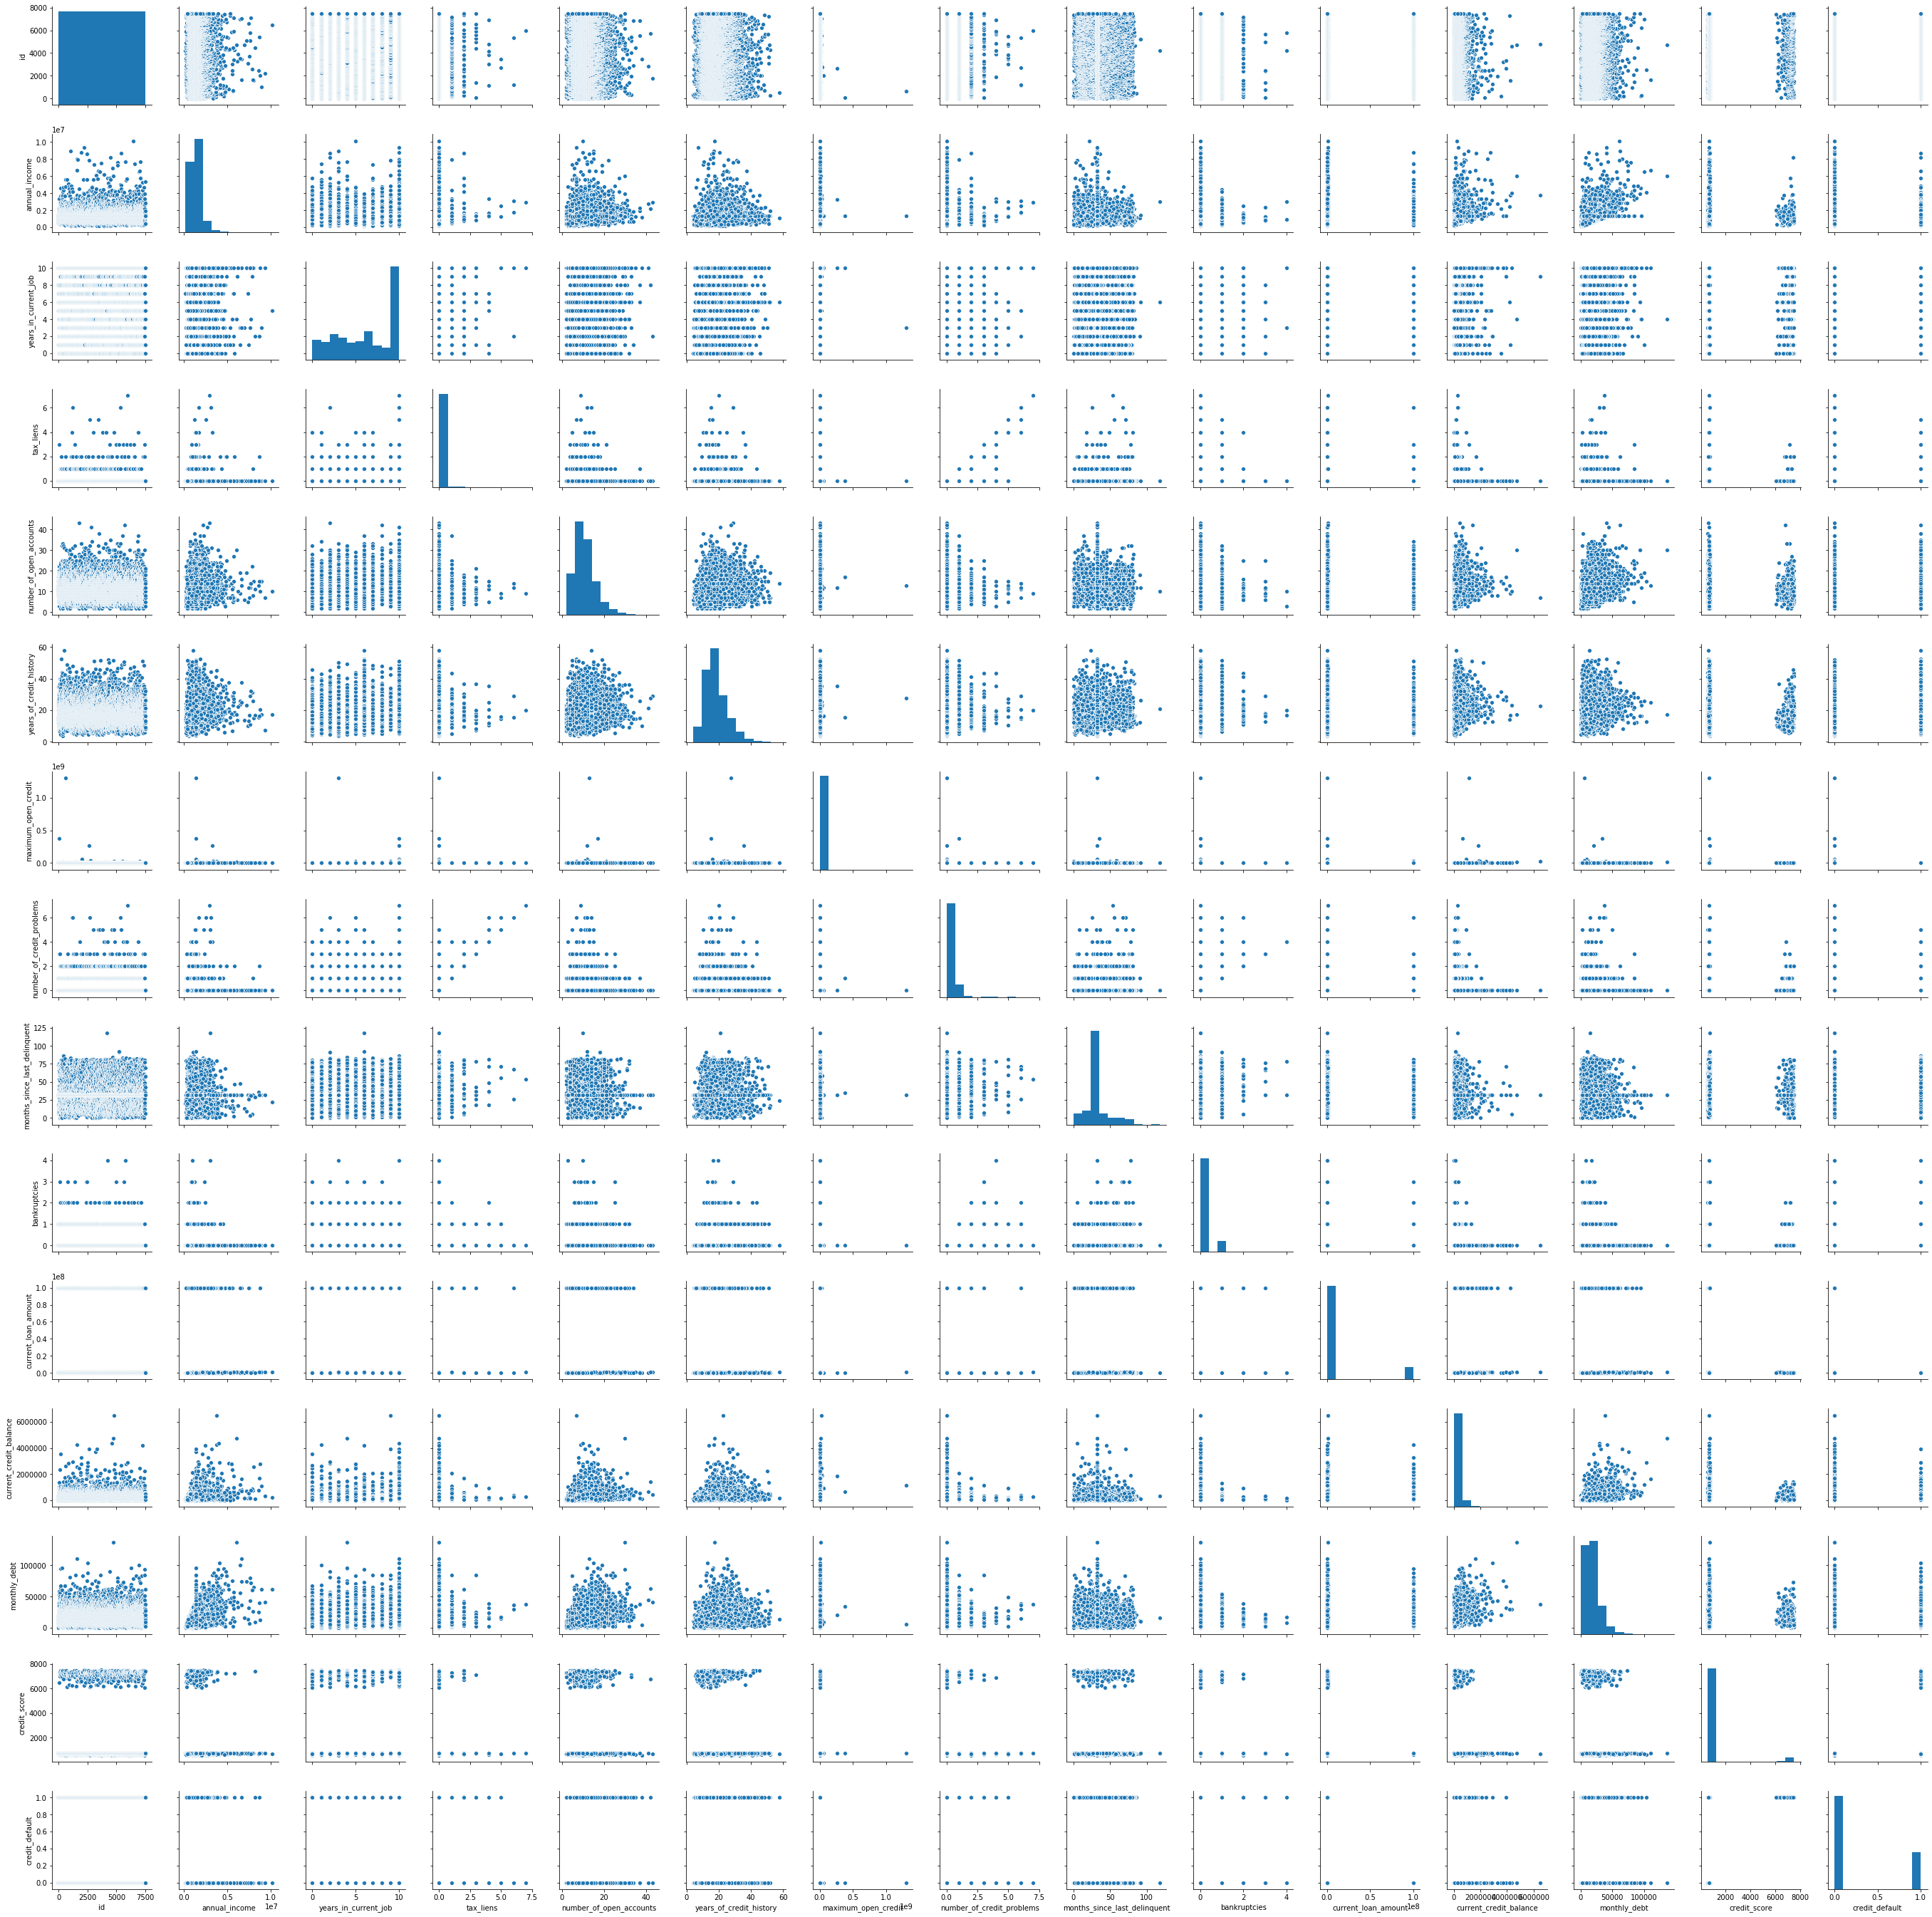

In [53]:
sns.pairplot(train_data)

In [54]:
train_data.columns

Index(['id', 'home_ownership', 'annual_income', 'years_in_current_job',
       'tax_liens', 'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'purpose', 'term',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score', 'credit_default'],
      dtype='object')

In [55]:
train_data = pd.get_dummies(train_data, drop_first = True)
train_data

,id,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,...,purpose_home improvements,purpose_major purchase,purpose_medical bills,purpose_moving,purpose_other,purpose_small business,purpose_take a trip,purpose_vacation,purpose_wedding,term_Short Term
0,0,4.820870e+05,6.0,0,11,26.3,685960,1,32.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,1,1.025487e+06,10.0,0,15,15.3,1181730,0,32.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,7.514120e+05,8.0,0,11,35.0,1182434,0,32.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,3,8.050680e+05,6.0,0,8,22.5,147400,1,32.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,4,7.762640e+05,8.0,0,13,13.6,385836,1,32.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,7495,4.021920e+05,0.0,0,3,8.5,107866,0,32.0,0.0,...,0,0,0,0,1,0,0,0,0,1
7496,7496,1.533984e+06,1.0,0,10,26.5,686312,0,43.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7497,7497,1.878910e+06,6.0,0,12,32.1,1778920,0,32.0,0.0,...,0,0,0,0,0,0,0,0,0,1
7498,7498,1.366392e+06,6.0,0,21,26.5,1141250,0,32.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
train_data.columns

Index(['id', 'annual_income', 'years_in_current_job', 'tax_liens',
       'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'current_loan_amount',
       'current_credit_balance', 'monthly_debt', 'credit_score',
       'credit_default', 'home_ownership_Home Mortgage',
       'home_ownership_Own Home', 'home_ownership_Rent', 'purpose_buy a car',
       'purpose_buy house', 'purpose_debt consolidation',
       'purpose_educational expenses', 'purpose_home improvements',
       'purpose_major purchase', 'purpose_medical bills', 'purpose_moving',
       'purpose_other', 'purpose_small business', 'purpose_take a trip',
       'purpose_vacation', 'purpose_wedding', 'term_Short Term'],
      dtype='object')

In [57]:
test_data

,id,home_ownership,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score
0,7500,Rent,1.366922e+06,4.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,731.0
1,7501,Rent,2.318380e+05,1.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,7502,Home Mortgage,1.152540e+06,3.0,0.0,10.0,13.7,204600.0,0.0,30.0,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,7503,Home Mortgage,1.220313e+06,10.0,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,7504,Home Mortgage,2.340952e+06,6.0,0.0,11.0,23.6,1207272.0,0.0,30.0,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,9995,Home Mortgage,1.020053e+06,10.0,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,9996,Home Mortgage,1.366922e+06,2.0,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,731.0
2497,9997,Home Mortgage,1.171806e+06,2.0,0.0,48.0,12.8,1706430.0,0.0,30.0,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,9998,Rent,7.235200e+05,10.0,0.0,14.0,28.8,945780.0,0.0,30.0,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0


In [58]:
test_data.columns

Index(['id', 'home_ownership', 'annual_income', 'years_in_current_job',
       'tax_liens', 'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'purpose', 'term',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score'],
      dtype='object')

In [59]:
test_data = pd.get_dummies(test_data, drop_first =True)
test_data

,id,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,...,purpose_home improvements,purpose_major purchase,purpose_medical bills,purpose_moving,purpose_other,purpose_small business,purpose_take a trip,purpose_vacation,purpose_wedding,term_Short Term
0,7500,1.366922e+06,4.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,7501,2.318380e+05,1.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,7502,1.152540e+06,3.0,0.0,10.0,13.7,204600.0,0.0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,7503,1.220313e+06,10.0,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,7504,2.340952e+06,6.0,0.0,11.0,23.6,1207272.0,0.0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,9995,1.020053e+06,10.0,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2496,9996,1.366922e+06,2.0,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2497,9997,1.171806e+06,2.0,0.0,48.0,12.8,1706430.0,0.0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2498,9998,7.235200e+05,10.0,0.0,14.0,28.8,945780.0,0.0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
test_data.columns

Index(['id', 'annual_income', 'years_in_current_job', 'tax_liens',
       'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'current_loan_amount',
       'current_credit_balance', 'monthly_debt', 'credit_score',
       'home_ownership_Home Mortgage', 'home_ownership_Own Home',
       'home_ownership_Rent', 'purpose_buy a car', 'purpose_buy house',
       'purpose_debt consolidation', 'purpose_educational expenses',
       'purpose_home improvements', 'purpose_major purchase',
       'purpose_medical bills', 'purpose_moving', 'purpose_other',
       'purpose_small business', 'purpose_take a trip', 'purpose_vacation',
       'purpose_wedding', 'term_Short Term'],
      dtype='object')

## Spliting Train Data, Test Data

In [61]:
X_train = train_data.drop(['credit_default','id'], axis = 1)
y_train =train_data.credit_default
X_test = test_data.drop('id', axis = 1)

In [62]:
X_train.shape

(7498, 30)

In [63]:
X_test.shape

(2500, 30)

In [64]:
y_train.shape

(7498,)

In [65]:
X_train

,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,current_loan_amount,...,purpose_home improvements,purpose_major purchase,purpose_medical bills,purpose_moving,purpose_other,purpose_small business,purpose_take a trip,purpose_vacation,purpose_wedding,term_Short Term
0,4.820870e+05,6.0,0,11,26.3,685960,1,32.0,1.0,99999999,...,0,0,0,0,0,0,0,0,0,1
1,1.025487e+06,10.0,0,15,15.3,1181730,0,32.0,0.0,264968,...,0,0,0,0,0,0,0,0,0,0
2,7.514120e+05,8.0,0,11,35.0,1182434,0,32.0,0.0,99999999,...,0,0,0,0,0,0,0,0,0,1
3,8.050680e+05,6.0,0,8,22.5,147400,1,32.0,1.0,121396,...,0,0,0,0,0,0,0,0,0,1
4,7.762640e+05,8.0,0,13,13.6,385836,1,32.0,0.0,125840,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,4.021920e+05,0.0,0,3,8.5,107866,0,32.0,0.0,129360,...,0,0,0,0,1,0,0,0,0,1
7496,1.533984e+06,1.0,0,10,26.5,686312,0,43.0,0.0,444048,...,0,0,0,0,0,0,0,0,0,0
7497,1.878910e+06,6.0,0,12,32.1,1778920,0,32.0,0.0,99999999,...,0,0,0,0,0,0,0,0,0,1
7498,1.366392e+06,6.0,0,21,26.5,1141250,0,32.0,0.0,615274,...,0,0,0,0,0,0,0,0,0,1


In [66]:
X_test

,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,current_loan_amount,...,purpose_home improvements,purpose_major purchase,purpose_medical bills,purpose_moving,purpose_other,purpose_small business,purpose_take a trip,purpose_vacation,purpose_wedding,term_Short Term
0,1.366922e+06,4.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,162470.0,...,0,0,0,0,0,0,0,0,0,1
1,2.318380e+05,1.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,78298.0,...,0,0,0,0,0,0,0,0,0,1
2,1.152540e+06,3.0,0.0,10.0,13.7,204600.0,0.0,30.0,0.0,200178.0,...,0,0,0,0,0,0,0,0,0,1
3,1.220313e+06,10.0,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,217382.0,...,0,0,0,0,0,0,0,0,0,1
4,2.340952e+06,6.0,0.0,11.0,23.6,1207272.0,0.0,30.0,0.0,777634.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.020053e+06,10.0,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,99999999.0,...,0,0,0,0,0,0,0,0,0,1
2496,1.366922e+06,2.0,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,468512.0,...,0,0,0,0,0,0,0,0,0,1
2497,1.171806e+06,2.0,0.0,48.0,12.8,1706430.0,0.0,30.0,0.0,430496.0,...,0,0,0,0,0,0,0,0,0,1
2498,7.235200e+05,10.0,0.0,14.0,28.8,945780.0,0.0,30.0,0.0,257774.0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
y_train

0       0
1       1
2       0
3       0
4       0
       ..
7495    0
7496    1
7497    0
7498    0
7499    0
Name: credit_default, Length: 7498, dtype: int64

## Feature Scaling

In [68]:

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [69]:
X_train

array([[-1.17510677,  0.0322722 , -0.1109684 , ..., -0.03268166,
        -0.04477213,  0.59141777],
       [-0.45301064,  1.16565383, -0.1109684 , ..., -0.03268166,
        -0.04477213, -1.69085214],
       [-0.81721472,  0.59896302, -0.1109684 , ..., -0.03268166,
        -0.04477213,  0.59141777],
       ...,
       [ 0.68105901,  0.0322722 , -0.1109684 , ..., -0.03268166,
        -0.04477213,  0.59141777],
       [ 0.        ,  0.0322722 , -0.1109684 , ..., -0.03268166,
        -0.04477213,  0.59141777],
       [ 0.        , -0.53441861, -0.1109684 , ..., -0.03268166,
        -0.04477213,  0.59141777]])

In [70]:
X_test

array([[ 7.04230724e-04, -5.34418612e-01, -1.10968400e-01, ...,
        -3.26816583e-02, -4.47721301e-02,  5.91417769e-01],
       [-1.50764972e+00, -1.38445484e+00, -1.10968400e-01, ...,
        -3.26816583e-02, -4.47721301e-02,  5.91417769e-01],
       [-2.84176482e-01, -8.17764020e-01, -1.10968400e-01, ...,
        -3.26816583e-02, -4.47721301e-02,  5.91417769e-01],
       ...,
       [-2.58574892e-01, -1.10110943e+00, -1.10968400e-01, ...,
        -3.26816583e-02, -4.47721301e-02,  5.91417769e-01],
       [-8.54278955e-01,  1.16565383e+00, -1.10968400e-01, ...,
        -3.26816583e-02, -4.47721301e-02,  5.91417769e-01],
       [ 4.35925051e-01,  1.16565383e+00, -1.10968400e-01, ...,
        -3.26816583e-02, -4.47721301e-02, -1.69085214e+00]])

### Logistic Regression Modeling Buliding

In [101]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.07032429 0.06058656 0.00455333 0.07156954 0.07469845 0.07339472
 0.01468842 0.06015498 0.00961349 0.12503358 0.07587872 0.07866055
 0.20513341 0.00394001 0.00423485 0.00547241 0.00278577 0.00140044
 0.00836989 0.00027571 0.00433098 0.00162329 0.00247435 0.00050759
 0.00685891 0.00141282 0.00115136 0.00048008 0.00065215 0.02973934]


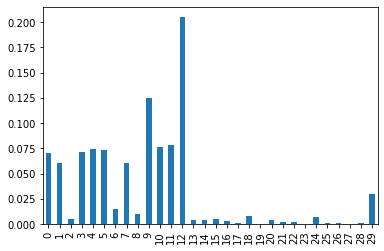

In [79]:
feat_importance = pd.Series(model.feature_importances_)
feat_importance.plot(kind = 'bar')
plt.show()

In [82]:
features = train_data.columns
features

Index(['id', 'annual_income', 'years_in_current_job', 'tax_liens',
       'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'current_loan_amount',
       'current_credit_balance', 'monthly_debt', 'credit_score',
       'credit_default', 'home_ownership_Home Mortgage',
       'home_ownership_Own Home', 'home_ownership_Rent', 'purpose_buy a car',
       'purpose_buy house', 'purpose_debt consolidation',
       'purpose_educational expenses', 'purpose_home improvements',
       'purpose_major purchase', 'purpose_medical bills', 'purpose_moving',
       'purpose_other', 'purpose_small business', 'purpose_take a trip',
       'purpose_vacation', 'purpose_wedding', 'term_Short Term'],
      dtype='object')

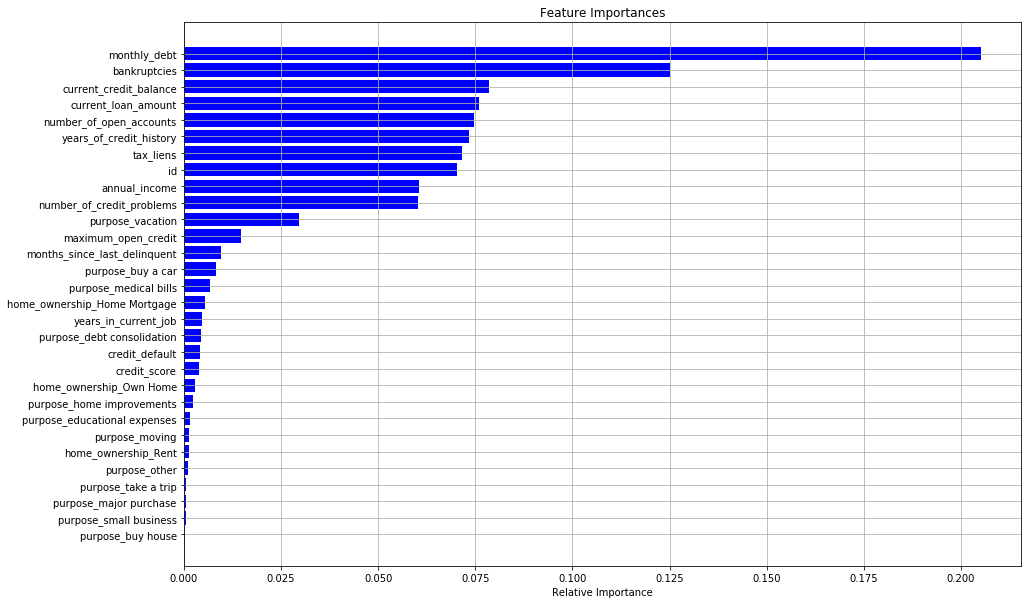

In [85]:
plt.figure(figsize = (15,10))
features = train_data.columns
importances = model.feature_importances_
plt.title('Feature Importances')
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

In [ ]:
linear_pred = linear_model.predict(X_test)

In [ ]:
linear_pred

### Decision Tree Classification Model Buliding

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
DT_Classification = DecisionTreeClassifier()
DT_Classification.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [131]:
DT_pred = DT_Classification.predict(X_test)

In [132]:
DT_Classification.score(X_train, y_train)

1.0

In [133]:
DT_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

### Random Forest Classification Model Buliding

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
RF_Classification = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RF_Classification.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
RF_pred = RF_Classification.predict(X_test)

In [118]:
RF_Classification.score(X_train, y_train)

0.983995732195252

In [119]:
RF_Classification.score(X_test, y_test)

NameError: name 'y_test' is not defined

In [ ]:
RF_pred

## Best Parameters

In [120]:
n_estimators        = [10,25,50,75,100]
max_features        = ['auto', 'sqrt', 'log2']
max_depth           = [10,20,30,40,50]
max_depth.append(None)
min_samples_split   = [2,5,10,15,20]
min_samples_leaf    = [1,2,5,10,15]

In [121]:
grid_param = {'n_estimators' : n_estimators,
             'max_features' : max_features,
             'max_depth'    : max_depth,
             'min_samples_split' : min_samples_split,
             'min_samples_leaf'  : min_samples_leaf
            }

In [122]:
from sklearn.model_selection import RandomizedSearchCV
RF_cls = RandomForestClassifier(random_state = 42)
RF_cls_random = RandomizedSearchCV(RF_cls, param_distributions = grid_param,
                                   n_iter = 50, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)

In [123]:
RF_cls_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [124]:
print(RF_cls_random.best_params_)

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': None}


In [125]:
rf_cls = RandomForestClassifier(n_estimators =  50, min_samples_split =  2, min_samples_leaf =  5, 
                                 max_features = 'auto', max_depth = None)

In [126]:
rf_cls.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
rf_cls.score(X_train, y_train)

0.8519605228060816

In [128]:
rf_pred = rf_cls.predict(X_test)
rf_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

## CV Score

In [ ]:
from sklearn.model_selection import cross_val_score

rf_cvs=cross_val_score(estimator = rf_cls,X=X_train,y=y_train,cv=10)
rf_cvs

In [ ]:
rf_cvs.mean()

## KNN Model Buliding

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
knn_model.fit(X_train, y_train)

In [ ]:
knn_pred = knn_model.predict(X_test)

In [ ]:
knn_model.score(X_train, y_train)

### Submitted Data

In [134]:
submission_data = pd.read_csv("E:\\Kaggle\\Loan Default Prediction\\Data\\sampleSubmission.csv")
submission_data

,Id,Credit Default
0,7500,0
1,7501,0
2,7502,0
3,7503,0
4,7504,0
...,...,...
2495,9995,0
2496,9996,0
2497,9997,0
2498,9998,0


In [135]:
DT_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [140]:
submission_data['Credit Default'] = RF_pred

In [141]:
submission_data

,Id,Credit Default
0,7500,0
1,7501,1
2,7502,1
3,7503,0
4,7504,0
...,...,...
2495,9995,0
2496,9996,1
2497,9997,1
2498,9998,0


In [142]:
submission_data['Credit Default'].value_counts()

0    2140
1     360
Name: Credit Default, dtype: int64

In [144]:
submission_data.to_csv (r'E:\\Kaggle\\Loan Default Prediction\\sampleSubmission_rf_1.csv', index = False, header=True)
